In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [10]:
f = xr.open_mfdataset("/g/data/du7/barpa/trials/BARPA_12km/cmip5/ACCESS1-0/r1i1p1/20491215T0000Z/20500124T0000Z/pp0/max_wnd10m_b-pp0-BARPA_12km-20500124T0000Z.nc")
u = xr.open_mfdataset("/g/data/du7/barpa/trials/BARPA_12km/cmip5/ACCESS1-0/r1i1p1/20491215T0000Z/20500124T0000Z/pp3/uwnd10m_b-pp3-BARPA_12km-20500124T0000Z.nc")
v = xr.open_mfdataset("/g/data/du7/barpa/trials/BARPA_12km/cmip5/ACCESS1-0/r1i1p1/20491215T0000Z/20500124T0000Z/pp3/vwnd10m_b-pp3-BARPA_12km-20500124T0000Z.nc")
p = xr.open_mfdataset("/g/data/du7/barpa/trials/BARPA_12km/cmip5/ACCESS1-0/r1i1p1/20491215T0000Z/20500124T0000Z/pp3/mslp-pp3-BARPA_12km-20500124T0000Z.nc")

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/

/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


96892.125


/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/g/data/eg3/ab4502/miniconda3/envs/wrfpython3.6/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


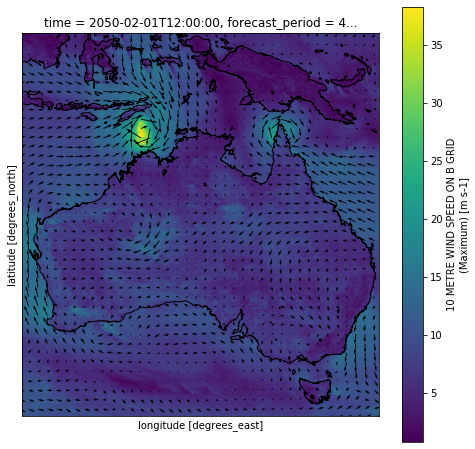

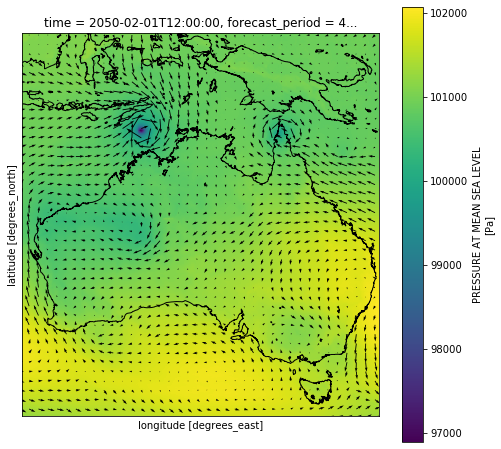

In [17]:
plt.figure(figsize=[8,8])
m = Basemap(llcrnrlon=112, llcrnrlat=-45, urcrnrlon=154, urcrnrlat=-0,projection="cyl",resolution="i"); m.drawcoastlines()
f.max_wnd10m_b.sel({"time":"2050-02-01 12:00","longitude":slice(112,154),"latitude":slice(-45,0)}).plot()
uc = u.uwnd10m_b.sel({"time":"2050-02-01 12:00","longitude":slice(112,154),"latitude":slice(-45,0)}).interp({"longitude":f.longitude,"latitude":f.latitude},method="linear",assume_sorted=True).coarsen({"longitude":10,"latitude":10},boundary="trim").mean()
vc = v.vwnd10m_b.sel({"time":"2050-02-01 12:00","longitude":slice(112,154),"latitude":slice(-45,0)}).interp({"longitude":f.longitude,"latitude":f.latitude},method="linear",assume_sorted=True).coarsen({"longitude":10,"latitude":10},boundary="trim").mean()
x,y=np.meshgrid(uc.longitude,uc.latitude)
plt.quiver(x,y,uc.values, vc.values,scale=400)

plt.figure(figsize=[8,8])
m = Basemap(llcrnrlon=112, llcrnrlat=-45, urcrnrlon=154, urcrnrlat=-0,projection="cyl",resolution="i"); m.drawcoastlines()
p.mslp.sel({"time":"2050-02-01 12:00","longitude":slice(112,154),"latitude":slice(-45,0)}).plot()
print(p.mslp.sel({"time":"2050-02-01 12:00","longitude":slice(112,154),"latitude":slice(-45,0)}).values.min())
plt.quiver(x,y,uc.values, vc.values,scale=400)

In [13]:
p

<xarray.Dataset>
Dimensions:                  (latitude: 608, longitude: 1088, time: 80)
Coordinates:
  * time                     (time) datetime64[ns] 2050-01-24T03:00:00 ... 2050-02-03
  * latitude                 (latitude) float32 -53.46 -53.35 ... 13.309998
  * longitude                (longitude) float32 88.15 88.26 ... 207.61 207.72
    forecast_period          (time) timedelta64[ns] dask.array<shape=(80,), chunksize=(80,)>
    forecast_reference_time  datetime64[ns] ...
    realization              int64 ...
Data variables:
    latitude_longitude       int32 ...
    mslp                     (time, latitude, longitude) float32 dask.array<shape=(80, 608, 1088), chunksize=(80, 608, 1088)>
Attributes:
    source:                         Data from Met Office Unified Model
    um_version:                     11.4
    Conventions:                    CF-1.6, ACDD-1.3
    institution:                    Australian Bureau of Meteorology, GPO Box...
    title:                          Bu

In [49]:
uc.shape

(41, 108)